In [34]:
pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 326.8 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.4 MB 656.4 kB/s eta 0:00:03
   ------------ --------------------------- 0.5/1.4 MB 2.4 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.4 MB 2.8 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.4 MB 3.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.4 MB/s eta 0:00:00


In [35]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [36]:
order_products_train = pd.read_csv(r'C:\Users\USER\Downloads\instacart-market-basket-analysis\order_products__train.csv')
order_products_prior = pd.read_csv(r'C:\Users\USER\Downloads\instacart-market-basket-analysis\order_products__prior.csv')
orders = pd.read_csv(r'C:\Users\USER\Downloads\instacart-market-basket-analysis\orders.csv')
products = pd.read_csv(r'C:\Users\USER\Downloads\instacart-market-basket-analysis\products.csv')
aisles = pd.read_csv(r'C:\Users\USER\Downloads\instacart-market-basket-analysis\aisles.csv\aisles.csv')
departments = pd.read_csv(r'C:\Users\USER\Downloads\instacart-market-basket-analysis\departments.csv')

In [40]:
df = pd.concat([order_products_train, order_products_prior] )
df = pd.merge(df, products, on='product_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15


In [41]:
print("Number of unique products in the dataset: ", len(df['product_id'].unique()))

Number of unique products in the dataset:  49685


In [43]:
df_by_product = df.groupby(['product_id' ,  'product_name'])['order_id'].count().reset_index().rename(columns = {'order_id': 'order_count'})
df_by_product = df_by_product.sort_values(by='order_count', ascending=False)[:100].reset_index(drop=True)
df_by_product.head()

,product_id,product_name,order_count
0,24852,Banana,491291
1,13176,Bag of Organic Bananas,394930
2,21137,Organic Strawberries,275577
3,21903,Organic Baby Spinach,251705
4,47209,Organic Hass Avocado,220877


In [44]:
# keep only the products that appear in the top 100
products_in_top_100 = df_by_product['product_id'].unique()

In [45]:
df_by_top_product = df[ df['product_id'].isin(products_in_top_100 ) ]

print( "Number of orders from the top 100 products: ", len( df_by_top_product['order_id'].unique()) )
print( "Number of orders in the dataset : ", len(df['order_id'].unique()) )

Number of orders from the top 100 products:  2444982
Number of orders in the dataset :  3346083


In [46]:
df_by_top_product.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
3,1,49683,4,0,Cucumber Kirby,83,4
5,1,13176,6,0,Bag of Organic Bananas,24,4
6,1,47209,7,0,Organic Hass Avocado,24,4
7,1,22035,8,1,Organic Whole String Cheese,21,16
9,36,19660,2,1,Spring Water,115,7


In [48]:
#making basket
df_cross = pd.crosstab(
 df_by_top_product['order_id'],
 df_by_top_product['product_name'] ,
 values=df_by_top_product['reordered'],
 aggfunc='count' , 
 normalize=False, 
 dropna=False
 ).fillna(0)

df_cross.head()

product_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Bartlett Pears,Blueberries,Boneless Skinless Chicken Breasts,...,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Whole Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df_support = apriori(df_cross, min_support=0.01, use_colnames=True, low_memory=True)
df_support.head()

C:\Users\USER\new folder\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.016062,(100% Raw Coconut Water)
1,0.025814,(100% Whole Wheat Bread)
2,0.015800,(2% Reduced Fat Milk)
3,0.035694,(Apple Honeycrisp Organic)
4,0.029101,(Asparagus)


In [50]:
df_rule_by_permutation = association_rules(df_support, metric="lift", min_threshold=1)
df_rule_by_permutation.sort_values('lift', ascending=False)

df_rule_by_permutation.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Organic Baby Spinach),(Bag of Organic Bananas),0.102948,0.161527,0.021517,0.209007,1.293944,0.004888,1.060026,0.253239
1,(Bag of Organic Bananas),(Organic Baby Spinach),0.161527,0.102948,0.021517,0.133208,1.293944,0.004888,1.034911,0.270932
2,(Bag of Organic Bananas),(Organic Hass Avocado),0.161527,0.090339,0.026487,0.163981,1.815175,0.011895,1.088087,0.535603
3,(Organic Hass Avocado),(Bag of Organic Bananas),0.090339,0.161527,0.026487,0.293199,1.815175,0.011895,1.186294,0.493688
4,(Bag of Organic Bananas),(Organic Raspberries),0.161527,0.058325,0.017294,0.107065,1.835662,0.007873,1.054584,0.542936


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


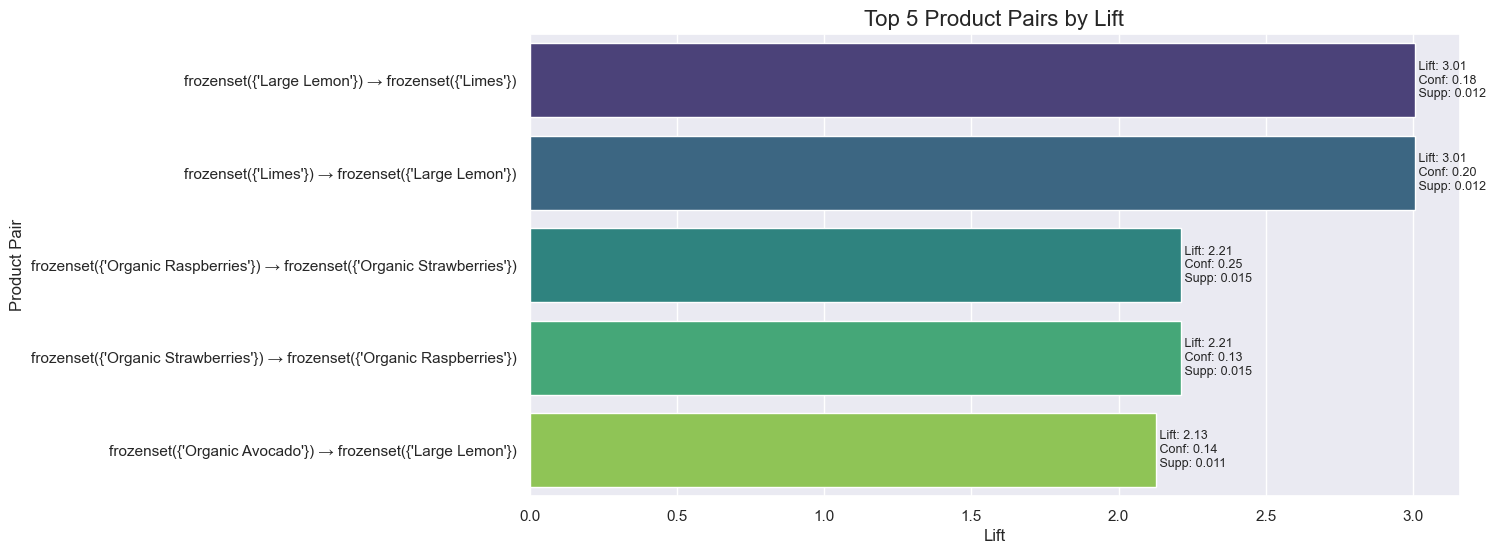

In [51]:
top_5 = df_rule_by_permutation.sort_values('lift', ascending=False).head()


plot_df = pd.DataFrame({
    'Product Pair': [f"{ant} → {con}" for ant, con in zip(top_5['antecedents'], top_5['consequents'])],
    'Lift': top_5['lift'],
    'Support': top_5['support'],
    'Confidence': top_5['confidence']
})
plt.figure(figsize=(12, 6))


ax = sns.barplot(x='Lift', y='Product Pair', data=plot_df, palette='viridis')


plt.title('Top 5 Product Pairs by Lift', fontsize=16)
plt.xlabel('Lift', fontsize=12)
plt.ylabel('Product Pair', fontsize=12)

for i, v in enumerate(plot_df['Lift']):
    ax.text(v, i, f' Lift: {v:.2f}\n Conf: {plot_df["Confidence"].iloc[i]:.2f}\n Supp: {plot_df["Support"].iloc[i]:.3f}', 
            va='center', fontsize=9)

In [52]:
from mlxtend.frequent_patterns import fpgrowth

# Using the same basket matrix as before
# Apply FP-Growth algorithm
frequent_itemsets_fpgrowth = fpgrowth(df_cross, min_support=0.01, use_colnames=True)

# Generate association rules
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1)

# Display rules
print("FP-Growth Rules:")
print(rules_fpgrowth)


C:\Users\USER\new folder\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


FP-Growth Rules:
                 antecedents               consequents  antecedent support  \
0   (Bag of Organic Bananas)    (Organic Hass Avocado)            0.161527   
1     (Organic Hass Avocado)  (Bag of Organic Bananas)            0.090339   
2     (Organic Baby Spinach)    (Organic Hass Avocado)            0.102948   
3     (Organic Hass Avocado)    (Organic Baby Spinach)            0.090339   
4     (Organic Hass Avocado)    (Organic Strawberries)            0.090339   
5     (Organic Strawberries)    (Organic Hass Avocado)            0.112711   
6           (Cucumber Kirby)                  (Banana)            0.040789   
7                   (Banana)          (Cucumber Kirby)            0.200938   
8                   (Banana)    (Organic Baby Spinach)            0.200938   
9     (Organic Baby Spinach)                  (Banana)            0.102948   
10    (Organic Baby Spinach)    (Organic Strawberries)            0.102948   
11    (Organic Strawberries)    (Organic Baby S

In [58]:
top__5= rules_fpgrowth.sort_values('lift', ascending=False).head()

In [59]:
top__5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
55,(Large Lemon),(Limes),0.065764,0.059984,0.011860,0.180345,3.006544,0.007915,1.146843,0.714372
54,(Limes),(Large Lemon),0.059984,0.065764,0.011860,0.197723,3.006544,0.007915,1.164480,0.709980
19,(Organic Strawberries),(Organic Raspberries),0.112711,0.058325,0.014533,0.128940,2.210731,0.007959,1.081069,0.617230
18,(Organic Raspberries),(Organic Strawberries),0.058325,0.112711,0.014533,0.249174,2.210731,0.007959,1.181751,0.581582
40,(Organic Avocado),(Large Lemon),0.075348,0.065764,0.010538,0.139862,2.126728,0.005583,1.086147,0.572966
